In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import pandas as pd
#load data
dataSet = load_dataset('lukebarousse/data_jobs')
df = dataSet['train'].to_pandas()
#clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x : ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [7]:
df['job_schedule_type'].value_counts().head(5)

job_schedule_type
Full-time                  701727
Contractor                  34793
Internship                   8742
Part-time                    7881
Full-time and Part-time      6287
Name: count, dtype: int64

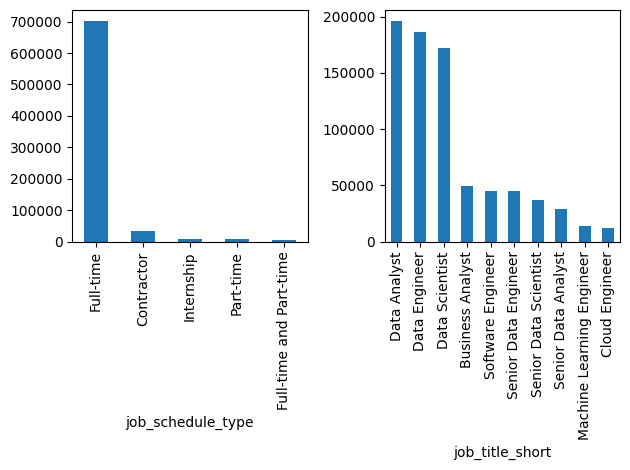

In [17]:
fig, ax =plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[1])
df['job_schedule_type'].value_counts().head(5).plot(kind='bar',ax=ax[0])
fig.tight_layout()

In [18]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


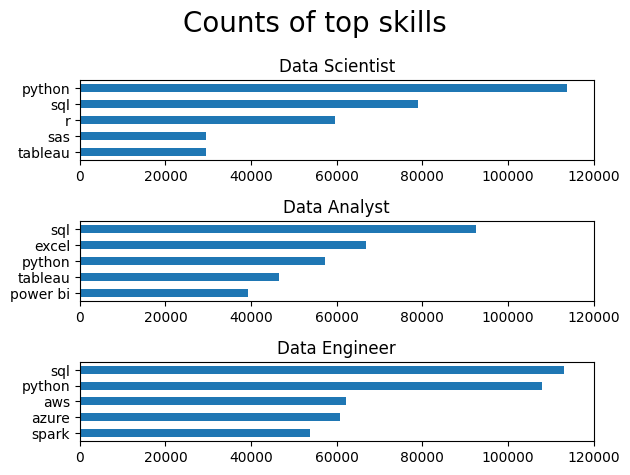

In [37]:
job_titles = ['Data Scientist','Data Analyst','Data Engineer']

fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', title=job_title, ax=ax[i])
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of top skills',fontsize=20)
fig.tight_layout()    
    